<a href="https://colab.research.google.com/github/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/Projeto_1_Processamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 - Processamento de dados

Alunos:

Afonso Henrique Piacentini Garcia, Nº USP: 9795272

Breno Lívio Silva de Almeida, Nº USP: 10276675

Vitor Henrique Gratiere Torres, Nº USP: 10284952

---

## Descrição

Essa parte do projeto da disciplina consiste no processamento de um conjunto de dados, um dataset. O conjunto de dados escolhido foi o de [Pokémons](https://www.pokemon.com/br/), do vídeo-game homônimo. As criaturas, chamadas de Pokémons, são representadas no jogo em questão por um item chamado [Pokédex](https://www.pokemon.com/br/pokedex/), que contém o nome e outras estatísticas relevantes aos jogos, como pontos de vida, ataque e etc. Os dados referentes à Pokédex foram retirados do site [Pokémon Database](https://pokemondb.net/pokedex/all). Também retiramos um [dataset do site Kaggle](https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420). Ele será usado para utilizar informações relevantes como as gerações, peso e altura dos Pokémons.

### [pokemon.csv](https://github.com/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/crawler/pokemon.csv)

*   attack: stat que indica o poder de ataque fisico base do pokémon
*   cod: O número do pokémon na pokédex
*   defense: stat que indica a defesa física base do pokémon
*   hp: stat que indica a vida base do pokémon
*   img: link para a imagem do pokémon 
*   name: O nome do pokémon
*   spatk: stat que indica o poder de ataque especial do pokémon
*   spdef: stat que indica o poder de defesa especial do pokémon
*   speed: stat que indica a velocidade base do pokémon
*   form: discriminante de mega evoluções e outras formas
*   total: soma total dos stats do pokémon
*   type1: tipo do pokémon
*   type2: segundo tipo do pokémon, caso possua
*   generation: a qual geração o pokémon em questão pertence
*   status: refere-se a raridade do pokémon, variando de normal até mítico
*   species: apelido dado para cada pokémon baseado em algum de seus atributos
*   height_m: altura do pokémon em metros
*   weight_kg: peso do pokémon em kilogramas

### [pokemonKaggle.csv](https://github.com/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/kaggle/pokedexKaggle.csv)

## Desenvolvimento


Leitura do CSV gerado do Pokémon Database como data frame do Pandas

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('bright')  # definicao da paleta de cores

dfPokemonDB = pd.read_csv(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computatio" +
    "nal_Visualization/master/notebooks/crawler/pokemon.csv",
    dtype={
        'attack': np.int32,
        'cod': str,
        'defense': np.int32,
        'hp': np.int32,
        'spatk': np.int32,
        'spdef': np.int32,
        'speed': np.int32,
        'total': np.int32},
    keep_default_na = False)

dfPokemonDB['img'].replace('', np.nan, inplace=True)

dfPokemonDB.dropna(subset=['img'], inplace=True)

dfPokemonDB.sample(5)

,attack,cod,defense,form,hp,img,name,spatk,spdef,speed,total,type1,type2
70,70,053,60,,65,https://img.pokemondb.net/sprites/sword-shield...,Persian,65,65,115,440,Normal,
363,110,306,180,,70,https://img.pokemondb.net/sprites/sword-shield...,Aggron,60,60,50,530,Steel,Rock
579,120,487,100,Origin Forme,150,https://img.pokemondb.net/sprites/sword-shield...,Giratina,120,100,90,680,Ghost,Dragon
381,70,320,35,,130,https://img.pokemondb.net/sprites/sword-shield...,Wailmer,70,35,60,400,Water,
536,90,452,110,,70,https://img.pokemondb.net/sprites/sword-shield...,Drapion,60,75,95,500,Poison,Dark


Leitura do CSV retirado do Kaggle como data frame do Pandas

In [2]:
fields = ['generation', 'status', 'species', 'height_m', 'weight_kg']

dfPokemonKaggle = pd.read_csv(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computatio" +
    "nal_Visualization/master/notebooks/kaggle/pokedexKaggle.csv",
    usecols = fields,
    dtype={
        'generation': np.int32,
        'status': str,
        'species': str,
        'height_m': np.single,
        'weight_kg': np.single})

dfPokemonKaggle.sample(5)

,generation,status,species,height_m,weight_kg
94,1,Normal,Rock Pokémon,0.4,20.299999
123,1,Normal,Shadow Pokémon,1.4,40.500000
865,7,Normal,Bee Fly Pokémon,0.2,0.500000
138,1,Normal,Punching Pokémon,1.4,50.200001
562,4,Normal,Snow Land Pokémon,1.3,26.600000


Vamos dar "merge" com os dois datasets, combinando as variáveis relevantes para análise. Da forma como o dataset foi coletado, precisamos reposicionar as colunas.

In [3]:
dfPokemonDB['tmp'] = np.arange(len(dfPokemonDB))
dfPokemonKaggle['tmp'] = np.arange(len(dfPokemonKaggle))

dfPokemon = pd.merge(dfPokemonDB, dfPokemonKaggle, on = 'tmp')

dfPokemon = dfPokemon.drop('tmp', axis=1)

dfPokemon = dfPokemon[['cod',
                       'name',
                       'generation',
                       'status',
                       'species',
                       'form',
                       'type1',
                       'type2',
                       'height_m',
                       'weight_kg',
                       'total',
                       'hp',
                       'attack',
                       'defense',
                       'spatk',
                       'spdef',
                       'speed',
                       'img']]

dfPokemon.head(1035)

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
0,001,Bulbasaur,1,Normal,Seed Pokémon,,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,https://img.pokemondb.net/sprites/sword-shield...
1,002,Ivysaur,1,Normal,Seed Pokémon,,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,https://img.pokemondb.net/sprites/sword-shield...
2,003,Venusaur,1,Normal,Seed Pokémon,,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,https://img.pokemondb.net/sprites/sword-shield...
3,003,Venusaur,1,Normal,Seed Pokémon,Mega Venusaur,Grass,Poison,2.4,155.5,625,80,100,123,122,120,80,https://img.pokemondb.net/sprites/sword-shield...
4,004,Charmander,1,Normal,Lizard Pokémon,,Fire,,0.6,8.5,309,39,52,43,60,50,65,https://img.pokemondb.net/sprites/sword-shield...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian,8,Legendary,Warrior Pokémon,Hero of Many Battles,Fairy,,2.8,110.0,670,92,130,115,80,115,138,https://img.pokemondb.net/sprites/sword-shield...
1024,889,Zamazenta,8,Legendary,Warrior Pokémon,Crowned Shield,Fighting,Steel,2.9,785.0,720,92,130,145,80,145,128,https://img.pokemondb.net/sprites/sword-shield...
1025,889,Zamazenta,8,Legendary,Warrior Pokémon,Hero of Many Battles,Fighting,,2.9,210.0,670,92,130,115,80,115,138,https://img.pokemondb.net/sprites/sword-shield...
1026,890,Eternatus,8,Legendary,Gigantic Pokémon,,Poison,Dragon,20.0,950.0,690,140,85,95,145,95,130,https://img.pokemondb.net/sprites/sword-shield...


### Gerações dos Pokémons

A série de jogos Pokemon se iniciou em 1996, com os jogos *Pokemon Red* e *Pokemon Green*. Com o passar do tempo e lançamento de novos jogos, novas criaturas e mecânicas foram sendo integradas ao jogo, e com isso criou-se o sistema de gerações para facilitar a organização dos pokemons.

1ª geração: Bulbasaur 001 - Mew 151

2ª geração: Chikorita 152 - Celebi 251

3ª geração: Treecko 252 - Deoxys 386

4ª geração: Turtwig 387 - Arceus 493

5ª geração: Victini 494 - Genesect 649

6ª geração: Chespin 650 - Volcanion 721

7ª geração: Rowlet 722 - Melmetal 809

8ª geração: Grookey 810 - Eternamax 890

Para fazer manipulações e análises mais interessantes no decorrer do projeto, iremos separar os Pokémons em gerações. Vamos criar uma coluna para indicar a geração de cada um dos pokémons do dataset. Começamos alocando valores NaN para ela. Em seguida, com os indices de até qual pokémon faz parte de uma geração, alocamos as gerações para cada pokémon.

In [4]:
# Nova coluna
dfPokemon.insert(0, 'generation', np.nan)

# Definição da coluna 'cod.num' como np.int32 da coluna 'cod' (string) para indexação
dfPokemon.loc[:, 'cod.num'] = dfPokemon.loc[:, 'cod'].astype(np.int32)

# Definição das gerações
dfPokemon.loc[(dfPokemon.loc[:, 'cod.num'] >= 1) & (dfPokemon.loc[:, 'cod.num'] <= 151), 'generation'] = 1
dfPokemon.loc[(dfPokemon.loc[:, 'cod.num'] >= 152) & (dfPokemon.loc[:, 'cod.num'] <= 251), 'generation'] = 2
dfPokemon.loc[(dfPokemon.loc[:, 'cod.num'] >= 252) & (dfPokemon.loc[:, 'cod.num'] <= 386), 'generation'] = 3
dfPokemon.loc[(dfPokemon.loc[:, 'cod.num'] >= 387) & (dfPokemon.loc[:, 'cod.num'] <= 493), 'generation'] = 4
dfPokemon.loc[(dfPokemon.loc[:, 'cod.num'] >= 494) & (dfPokemon.loc[:, 'cod.num'] <= 649), 'generation'] = 5
dfPokemon.loc[(dfPokemon.loc[:, 'cod.num'] >= 650) & (dfPokemon.loc[:, 'cod.num'] <= 721), 'generation'] = 6
dfPokemon.loc[(dfPokemon.loc[:, 'cod.num'] >= 722) & (dfPokemon.loc[:, 'cod.num'] <= 809), 'generation'] = 7
dfPokemon.loc[(dfPokemon.loc[:, 'cod.num'] >= 810) & (dfPokemon.loc[:, 'cod.num'] <= 893), 'generation'] = 8

# Mudando a coluna 'generation' para np.int32
dfPokemon.loc[:, 'generation'] = dfPokemon.loc[:, 'generation'].astype(np.int32)

dfPokemon.head()

ValueError: ignored

### ava aqui explicando pq as mudanças:

(depois a gente apaga essa celula)

- ```dfPokemon.loc[dfPokemon['name']=='Mew'].tail(1).index.item()``` fazer isso é custoso pq ja que ```name``` nao ta ordenado, buscar por um nome é uma busca sequencial. do jeito q eu fiz agora esse esse condicional retorna um vetor booleano vertical, e o pyhton tem otimizações pra trabalhar com programacao vetorial

- ```dfPokemon["generation"][0:(g1+1)] = "1st"``` duas coisas aqui:
    1. ```["generation"][0:(g1+1)]``` fazer esse filtro direto nao é recomendado pq o pandas retorna uma copia do vetor, nesse caso sao dois cortes, entao ele retorna a copia de uma copia, é melhor usar a funcao ```loc``` q usa ponteiros
    2. ao inves de usarmos ```"1st"``` é melhor usarmos ints pq é mais facil de apresentar variaveis numericas doq variaveis descritivas
    
- e eu coloquei a coluna ```'generation'``` na posicao 0 pq movi a reodenacao das colunas pra depois da insersao da nova coluna

In [ ]:
# isso nao é necessario pq os zeros ja tao na coluna cod, só precisava ler o pokemon.csv definindo 'cod' como str

# newCod = np.nan

# for id in dfPokemon['cod']:
#   dd.a[dd.a == 1] = 100
#   dfPokemon.cod[dfPokemon.]
#   np.append(newCod, "{:03d}".format(id))

# newCod

Achando outliers

In [ ]:
data = dfPokemon

Q1 = data["total"].quantile(0.25)  # primeiro quartil
Q3 = data["total"].quantile(0.75)  # segundo quartil
IQR = Q3 - Q1  # distância interquartil

# vetor contendo os valores booleanos para cada uma das observações
# indicando se ele é um outlier (True) ou não (False)
out = ((data["total"] < (Q1 - 1.5 * IQR)) |
       (data["total"] > (Q3 + 1.5 * IQR)))

# vetor contendo os outliers para o conjunto de dados
pokemonOut = data[list(out)]

pokemonOut

,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
cod,,,,,,,,,,,,,,,,,
150,Mewtwo,1,Legendary,Genetic Pokémon,Mega Mewtwo X,Psychic,Fighting,2.0,122.000000,780,106,190,100,154,100,130,https://img.pokemondb.net/sprites/sword-shield...
150,Mewtwo,1,Legendary,Genetic Pokémon,Mega Mewtwo X,Psychic,Fighting,2.3,127.000000,780,106,190,100,154,100,130,https://img.pokemondb.net/sprites/sword-shield...
150,Mewtwo,1,Legendary,Genetic Pokémon,Mega Mewtwo X,Psychic,Fighting,1.5,33.000000,780,106,190,100,154,100,130,https://img.pokemondb.net/sprites/sword-shield...
150,Mewtwo,1,Legendary,Genetic Pokémon,Mega Mewtwo Y,Psychic,,2.0,122.000000,780,106,150,70,194,120,140,https://img.pokemondb.net/sprites/sword-shield...
150,Mewtwo,1,Legendary,Genetic Pokémon,Mega Mewtwo Y,Psychic,,2.3,127.000000,780,106,150,70,194,120,140,https://img.pokemondb.net/sprites/sword-shield...
150,Mewtwo,1,Legendary,Genetic Pokémon,Mega Mewtwo Y,Psychic,,1.5,33.000000,780,106,150,70,194,120,140,https://img.pokemondb.net/sprites/sword-shield...
382,Kyogre,3,Legendary,Sea Basin Pokémon,Primal Kyogre,Water,,4.5,352.000000,770,100,150,90,180,160,90,https://img.pokemondb.net/sprites/sword-shield...
382,Kyogre,3,Legendary,Sea Basin Pokémon,Primal Kyogre,Water,,9.8,430.000000,770,100,150,90,180,160,90,https://img.pokemondb.net/sprites/sword-shield...
383,Groudon,3,Legendary,Continent Pokémon,Primal Groudon,Ground,Fire,3.5,950.000000,770,100,180,160,150,90,90,https://img.pokemondb.net/sprites/sword-shield...


###Comparações entre os extremos dos stats

Comparações entre os extremos de todos os stats presentes nos pokémons, com imagens dos pokémons que possuem tais extremos


**Comparação hp**

In [34]:
hpPokemonMax=dfPokemon.loc[[dfPokemon['hp'].idxmax()]]
hpPokemonMax

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
288,242,Blissey,2,Normal,Happiness Pokémon,,Normal,,1.5,46.799999,540,255,10,10,75,135,55,https://img.pokemondb.net/sprites/sword-shield...


In [38]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= hpPokemonMax['img'].item(), width= 150, height= 150)

In [39]:
hpPokemonMin=dfPokemon.loc[[dfPokemon['hp'].idxmin()]]
hpPokemonMin

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
345,292,Shedinja,3,Normal,Shed Pokémon,,Bug,Ghost,0.8,1.2,236,1,90,45,30,30,40,https://img.pokemondb.net/sprites/sword-shield...


In [41]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= hpPokemonMin['img'].item(), width= 150, height= 150)

**Comparação attack**

In [43]:
attackPokemonMax=dfPokemon.loc[[dfPokemon['attack'].idxmax()]]
attackPokemonMax

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
189,150,Mewtwo,1,Legendary,Genetic Pokémon,Mega Mewtwo X,Psychic,Fighting,2.3,127.0,780,106,190,100,154,100,130,https://img.pokemondb.net/sprites/sword-shield...


In [44]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= attackPokemonMax['img'].item(), width= 150, height= 150)

In [45]:
attackPokemonMin=dfPokemon.loc[[dfPokemon['attack'].idxmin()]]
attackPokemonMin

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
145,113,Chansey,1,Normal,Egg Pokémon,,Normal,,1.1,34.599998,450,250,5,5,35,105,50,https://img.pokemondb.net/sprites/sword-shield...


In [46]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= attackPokemonMin['img'].item(), width= 150, height= 150)

**Comparação defense**

In [47]:
defensePokemonMax=dfPokemon.loc[[dfPokemon['defense'].idxmax()]]
defensePokemonMax

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
1027,890,Eternatus,8,Legendary,Gigantic Pokémon,Eternamax,Poison,Dragon,100.0,NaN,1125,255,115,250,125,250,130,https://img.pokemondb.net/sprites/sword-shield...


In [48]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= defensePokemonMax['img'].item(), width= 150, height= 150)

In [49]:
defensePokemonMin=dfPokemon.loc[[dfPokemon['defense'].idxmin()]]
defensePokemonMin

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
145,113,Chansey,1,Normal,Egg Pokémon,,Normal,,1.1,34.599998,450,250,5,5,35,105,50,https://img.pokemondb.net/sprites/sword-shield...


In [50]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= defensePokemonMin['img'].item(), width= 150, height= 150)

**Comparação spatk**

In [51]:
spatkPokemonMax=dfPokemon.loc[[dfPokemon['spatk'].idxmax()]]
spatkPokemonMax

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
190,150,Mewtwo,1,Legendary,Genetic Pokémon,Mega Mewtwo Y,Psychic,,1.5,33.0,780,106,150,70,194,120,140,https://img.pokemondb.net/sprites/sword-shield...


In [52]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= spatkPokemonMax['img'].item(), width= 150, height= 150)

In [54]:
spatkPokemonMin=dfPokemon.loc[[dfPokemon['hp'].idxmin()]]
spatkPokemonMin

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
345,292,Shedinja,3,Normal,Shed Pokémon,,Bug,Ghost,0.8,1.2,236,1,90,45,30,30,40,https://img.pokemondb.net/sprites/sword-shield...


In [55]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= spatkPokemonMin['img'].item(), width= 150, height= 150)

**Comparação spdef**

In [56]:
spdefPokemonMax=dfPokemon.loc[[dfPokemon['spdef'].idxmax()]]
spdefPokemonMax

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
1027,890,Eternatus,8,Legendary,Gigantic Pokémon,Eternamax,Poison,Dragon,100.0,NaN,1125,255,115,250,125,250,130,https://img.pokemondb.net/sprites/sword-shield...


In [57]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= spdefPokemonMax['img'].item(), width= 150, height= 150)

In [58]:
spdefPokemonMin=dfPokemon.loc[[dfPokemon['spdef'].idxmin()]]
spdefPokemonMin

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
13,010,Caterpie,1,Normal,Worm Pokémon,,Bug,,0.3,2.9,195,45,30,35,20,20,45,https://img.pokemondb.net/sprites/sword-shield...


In [59]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= spdefPokemonMin['img'].item(), width= 150, height= 150)

**Comparação speed**

In [60]:
speedPokemonMax=dfPokemon.loc[[dfPokemon['speed'].idxmax()]]
speedPokemonMax

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
463,386,Deoxys,3,Mythical,DNA Pokémon,Speed Forme,Psychic,,1.7,60.799999,600,50,95,90,95,90,180,https://img.pokemondb.net/sprites/sword-shield...


In [61]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= speedPokemonMax['img'].item(), width= 150, height= 150)

In [62]:
speedPokemonMin=dfPokemon.loc[[dfPokemon['speed'].idxmin()]]
speedPokemonMin

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
256,213,Shuckle,2,Normal,Mold Pokémon,,Bug,Rock,0.6,20.5,505,20,10,230,10,230,5,https://img.pokemondb.net/sprites/sword-shield...


In [63]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= speedPokemonMin['img'].item(), width= 150, height= 150)

**Comparação total**

In [64]:
totalPokemonMax=dfPokemon.loc[[dfPokemon['total'].idxmax()]]
totalPokemonMax

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
1027,890,Eternatus,8,Legendary,Gigantic Pokémon,Eternamax,Poison,Dragon,100.0,NaN,1125,255,115,250,125,250,130,https://img.pokemondb.net/sprites/sword-shield...


In [65]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= totalPokemonMax['img'].item(), width= 150, height= 150)

In [66]:
totalPokemonMin=dfPokemon.loc[[dfPokemon['total'].idxmin()]]
totalPokemonMin

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
871,746,Wishiwashi,7,Normal,Small Fry Pokémon,Solo Form,Water,,0.2,0.3,175,45,20,20,25,25,40,https://img.pokemondb.net/sprites/sword-shield...


In [67]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= totalPokemonMin['img'].item(), width= 150, height= 150)

# Para a parte 2

generation
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total, dtype: object

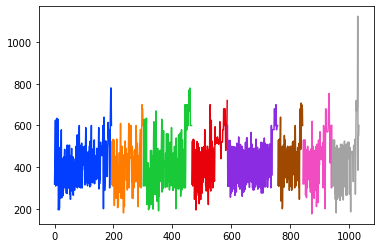

In [ ]:
dfPokemon.groupby("generation")["total"].plot()

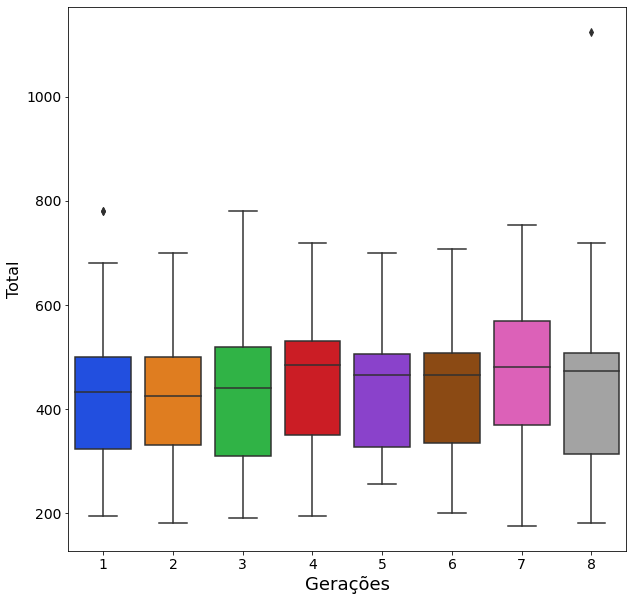

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="generation", y="total", data=dfPokemon)
plt.xlabel('Gerações', fontsize=18)
plt.ylabel('Total', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

array([[<AxesSubplot:title={'center':'generation'}>,
        <AxesSubplot:title={'center':'total'}>,
        <AxesSubplot:title={'center':'hp'}>],
       [<AxesSubplot:title={'center':'attack'}>,
        <AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'spatk'}>],
       [<AxesSubplot:title={'center':'spdef'}>,
        <AxesSubplot:title={'center':'speed'}>,
        <AxesSubplot:title={'center':'cod.num'}>]], dtype=object)

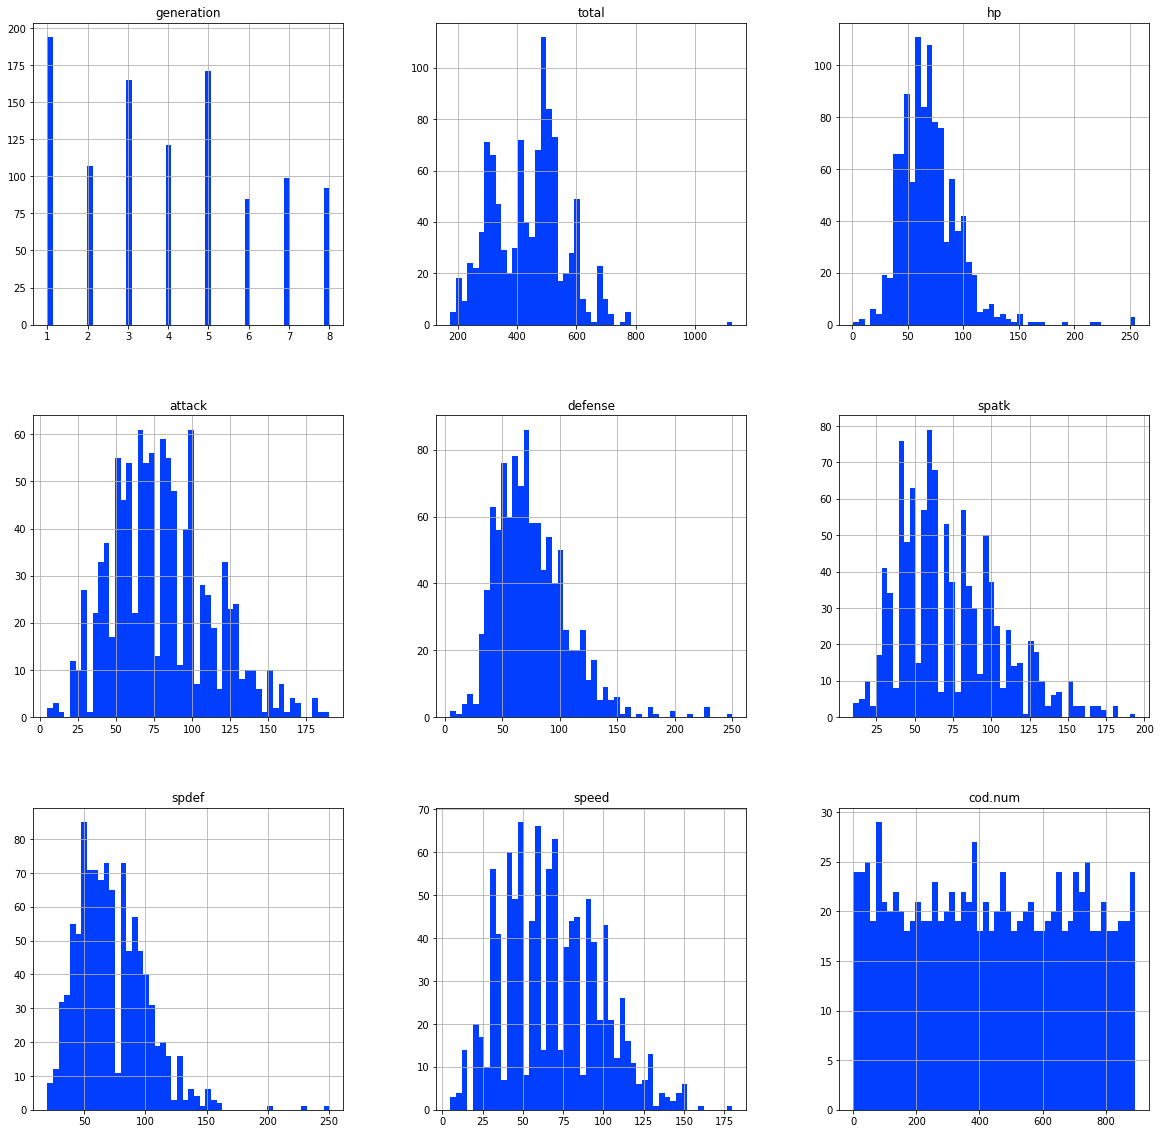

In [ ]:
dfPokemon.hist(bins=50, figsize=(20, 20))

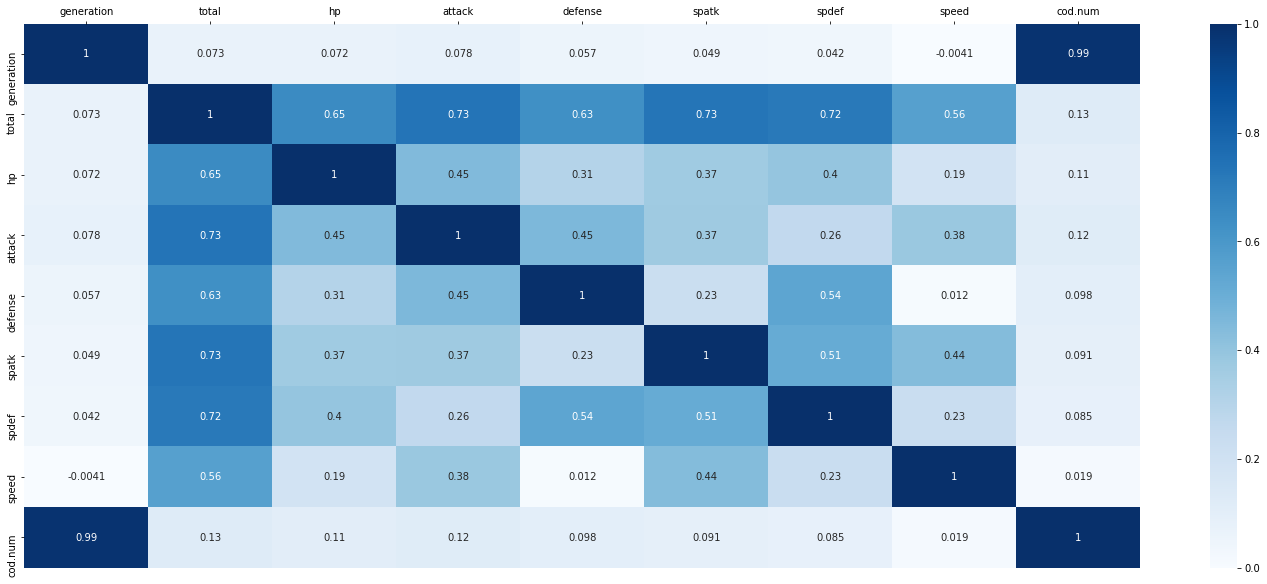

In [ ]:
corrmat = dfPokemon.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corrmat, vmax=1., vmin=0,
            annot=True, cmap='Blues').xaxis.tick_top()

<Figure size 1440x1440 with 0 Axes>

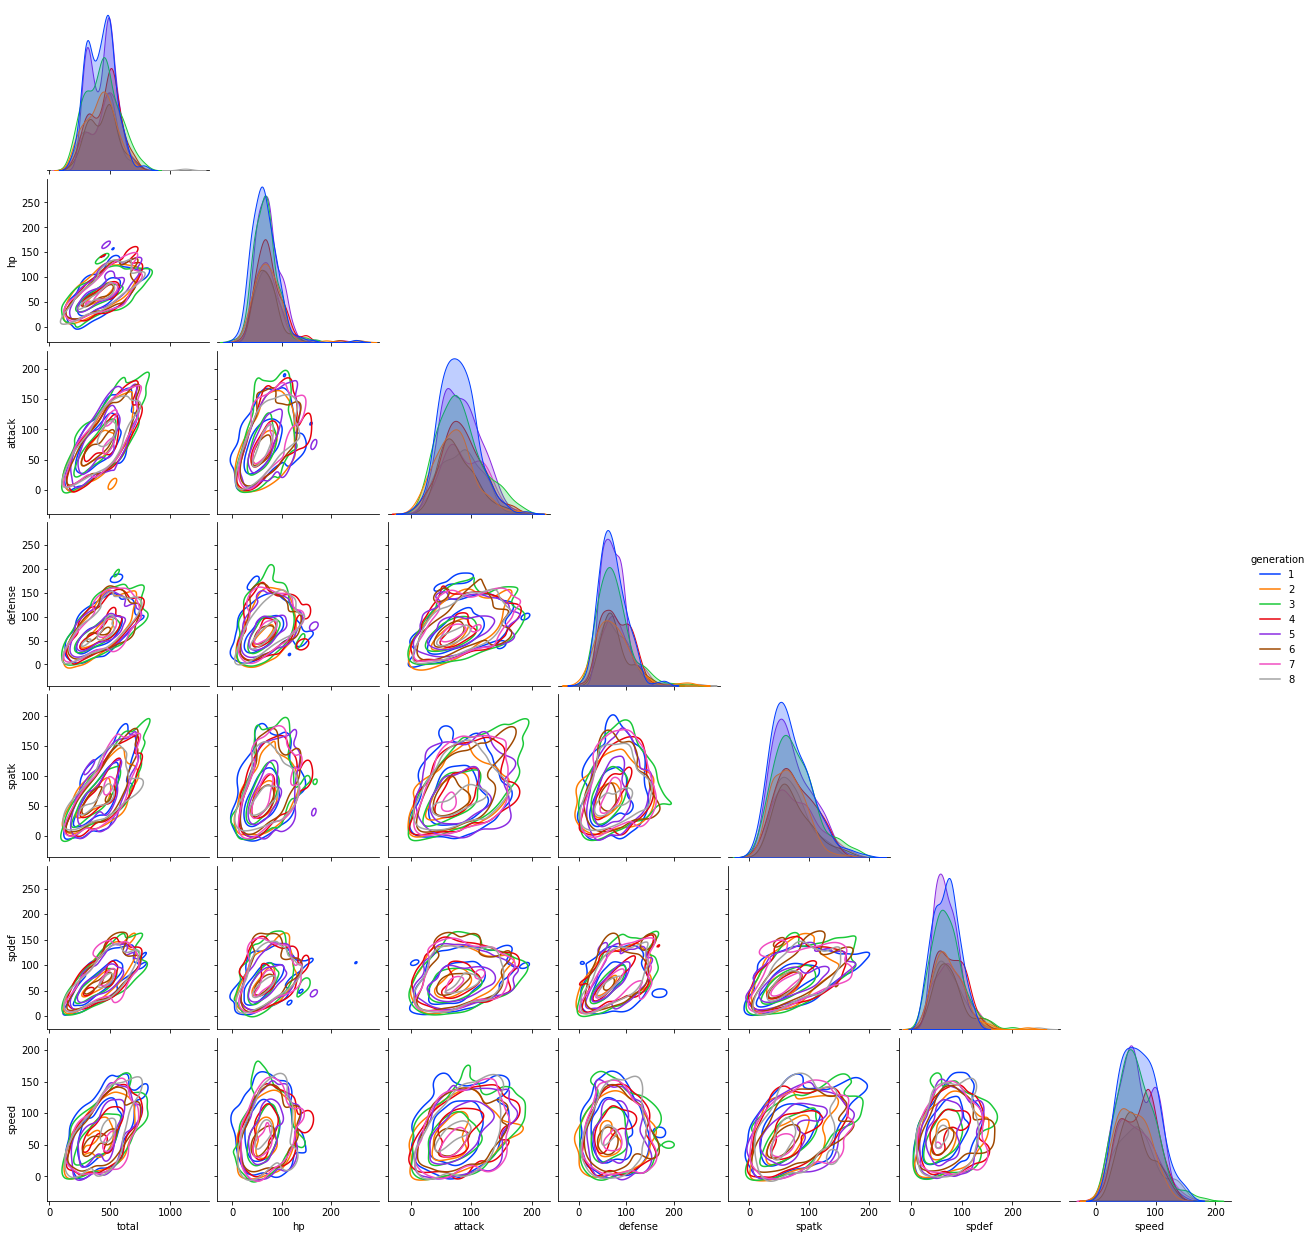

In [ ]:
plt.figure(figsize=(20, 20))
# sns.pairplot(dfPokemon.loc[dfPokemon.loc[:, 'generation'] == 2, :],
sns.pairplot(dfPokemon,
             vars=['total',
                   'hp',
                   'attack',
                   'defense',
                   'spatk',
                   'spdef',
                   'speed'],
             hue='generation',
             palette='bright',
             kind='kde',
             corner=True,
             plot_kws={'levels': 3})  # 'fill': True,'alpha': .2